In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load all three CSV files
sales_data = pd.read_csv('sales_data.csv')
product_info = pd.read_csv('product_info.csv')
customer_info = pd.read_csv('customer_info.csv')

# Display basic info about each dataset
print("Sales Data Shape:", sales_data.shape)
print("Product Info Shape:", product_info.shape)
print("Customer Info Shape:", customer_info.shape)

print("\nSales Data Columns:", list(sales_data.columns))
print("Product Info Columns:", list(product_info.columns))
print("Customer Info Columns:", list(customer_info.columns))

print("\nFirst few rows of each dataset:")
print("\nSales Data:")
print(sales_data.head(2))
print("\nProduct Info:")
print(product_info.head(2))
print("\nCustomer Info:")
print(customer_info.head(2))

Sales Data Shape: (3000, 10)
Product Info Shape: (30, 6)
Customer Info Shape: (500, 6)

Sales Data Columns: ['order_id', 'customer_id', 'product_id', 'quantity', 'unit_price', 'order_date', 'delivery_status', 'payment_method', 'region', 'discount_applied']
Product Info Columns: ['product_id', 'product_name', 'category', 'launch_date', 'base_price', 'supplier_code']
Customer Info Columns: ['customer_id', 'email', 'signup_date', 'gender', 'region', 'loyalty_tier']

First few rows of each dataset:

Sales Data:
  order_id customer_id product_id quantity  unit_price  order_date  \
0  O966977      C00397      P0022        3       39.25  06-07-2025   
1  O696648      C00236      P0023        5       18.92  06-07-2025   

  delivery_status payment_method   region  discount_applied  
0       Delivered         PayPal  Central               0.0  
1         DELAYED    credit card    North               0.0  

Product Info:
  product_id         product_name  category launch_date  base_price  \
0   

In [13]:
print("="*60)
print("CLEANING SALES_DATA - STEP BY STEP")
print("="*60)

# CHECKING THE DATA
print(f"Original shape: {sales_data.shape}")
print(f"Columns: {list(sales_data.columns)}")
print("\nChecking Missing values:")
print("\nMissing values:")
print(sales_data.isnull().sum())
print(f"\nDuplicate rows: {sales_data.duplicated().sum()}")

# drop duplicate rows in order_id, customer_id, product_id
critical_columns = ['order_id', 'customer_id', 'product_id']
sales_data = sales_data.dropna(subset=critical_columns)

# For quantity - fill with 1 (assuming at least 1 item ordered)
if 'quantity' in sales_data.columns:
    sales_data['quantity'] = sales_data['quantity'].fillna(1)
    
# For unit_price - use median price (better than mean for skewed data)
if 'unit_price' in sales_data.columns:
    median_price = sales_data['unit_price'].median()
    sales_data['unit_price'] = sales_data['unit_price'].fillna(median_price)

# For order_date - fill with mode (most common order date) or drop
if 'order_date' in sales_data.columns:
    sales_data = sales_data.dropna(subset=['order_date'])

# For delivery_status - fill with 'Unknown'
if 'delivery_status' in sales_data.columns:
    sales_data['delivery_status'] = sales_data['delivery_status'].fillna('Unknown')
    
# For payment_method - fill with 'Not Specified'
if 'payment_method' in sales_data.columns:
    sales_data['payment_method'] = sales_data['payment_method'].fillna('Not Specified')
    
# For discount_applied - fill with 0 (no discount)
if 'discount_applied' in sales_data.columns:
    sales_data['discount_applied'] = sales_data['discount_applied'].fillna(0)

print("\nMissing values after handling:")
missing_after = sales_data.isnull().sum()
print(missing_after[missing_after > 0])



CLEANING SALES_DATA - STEP BY STEP
Original shape: (2990, 10)
Columns: ['order_id', 'customer_id', 'product_id', 'quantity', 'unit_price', 'order_date', 'delivery_status', 'payment_method', 'region', 'discount_applied']

Checking Missing values:

Missing values:
order_id            0
customer_id         0
product_id          0
quantity            0
unit_price          0
order_date          0
delivery_status     0
payment_method      0
region              0
discount_applied    0
dtype: int64

Duplicate rows: 0

Missing values after handling:
Series([], dtype: int64)


In [19]:
print("\nSTANDARDIZING INCONSISTENT VALUES")
print("-" * 40)

# First, let's check the actual data types and unique values
print("Data types before standardization:")
print(sales_data[['quantity', 'unit_price', 'discount_applied']].dtypes)

print("\nSample of actual values in each column:")
print("Quantity sample:", sales_data['quantity'].unique()[:10])
print("Unit price sample:", sales_data['unit_price'].unique()[:10])
print("Discount sample:", sales_data['discount_applied'].unique()[:10])

# Standardize quantity column - handle mixed types
print("\nQuantity values before standardization:")
# Convert to string first to safely get value counts
print(sales_data['quantity'].astype(str).value_counts().sort_index())

# Create mapping for text numbers to numeric values
quantity_mapping = {
    'five': 5, 
    'three': 3,
}


# Convert everything to string first, then map, then convert to numeric
sales_data['quantity'] = sales_data['quantity'].astype(str)
sales_data['quantity'] = sales_data['quantity'].replace(quantity_mapping)
sales_data['quantity'] = pd.to_numeric(sales_data['quantity'], errors='coerce')

# Fill any resulting NaN values with 1 (reasonable default) and convert to integer
sales_data['quantity'] = sales_data['quantity'].fillna(1).astype(int)

print("\nQuantity values after standardization:")
print(sales_data['quantity'].value_counts().sort_index())


STANDARDIZING INCONSISTENT VALUES
----------------------------------------
Data types before standardization:
quantity             object
unit_price          float64
discount_applied    float64
dtype: object

Sample of actual values in each column:
Quantity sample: ['3' '5' '1' '2' '4' 1 'three' 'five']
Unit price sample: [39.25 18.92 29.68 32.76 47.62 37.89 30.83 12.56 28.32 30.96]
Discount sample: [0.   0.15 0.2  0.1  0.05]

Quantity values before standardization:
quantity
1        577
2        633
3        596
4        580
5        602
five       1
three      1
Name: count, dtype: int64

Quantity values after standardization:
quantity
1    577
2    633
3    597
4    580
5    603
Name: count, dtype: int64


In [20]:
# Standardize unit_price - ensure 2 decimal places
print("\nUnit price before standardization (sample):")
print(sales_data['unit_price'].head(10))

# Convert to string first, then to numeric to handle any string values
sales_data['unit_price'] = sales_data['unit_price'].astype(str)
sales_data['unit_price'] = pd.to_numeric(sales_data['unit_price'], errors='coerce')
sales_data['unit_price'] = sales_data['unit_price'].round(2)

print("\nUnit price after standardization (sample):")
print(sales_data['unit_price'].head(10))


Unit price before standardization (sample):
0    39.25
1    18.92
2    29.68
3    32.76
4    47.62
5    37.89
6    30.83
7    12.56
8    28.32
9    30.96
Name: unit_price, dtype: float64

Unit price after standardization (sample):
0    39.25
1    18.92
2    29.68
3    32.76
4    47.62
5    37.89
6    30.83
7    12.56
8    28.32
9    30.96
Name: unit_price, dtype: float64


In [26]:
# Standardize delivery_status - fix inconsistent casing and abbreviations
print("\nDelivery status before standardization:")
print(sales_data['delivery_status'].value_counts())

# First, remove any leading/trailing whitespace
sales_data['delivery_status'] = sales_data['delivery_status'].str.strip()

# Create mapping for delivery status standardization
delivery_mapping = {
    'DELAYED': 'Delayed',
    'delrd': 'Delivered', 
    'delyd': 'Delivered',          
}

# Apply standardization
sales_data['delivery_status'] = sales_data['delivery_status'].replace(delivery_mapping)

# Ensure title case for any remaining values
sales_data['delivery_status'] = sales_data['delivery_status'].str.title()

print("\nDelivery status after standardization:")
print(sales_data['delivery_status'].value_counts())



Delivery status before standardization:
delivery_status
Delivered      1228
 Delayed        591
 Cancelled      589
Delayed         579
Unknown           3
Name: count, dtype: int64

Delivery status after standardization:
delivery_status
Delivered    1228
Delayed      1170
Cancelled     589
Unknown         3
Name: count, dtype: int64


In [27]:
# Standardize region - fix inconsistent casing and abbreviations
print("\nRegion before standardization:")
print(sales_data['region'].value_counts())

# Create mapping for region standardization
region_mapping = {
    'NORTH': 'North',
    'nrth': 'North',
}

# Apply standardization
sales_data['region'] = sales_data['region'].replace(region_mapping)

# Ensure title case for any remaining values
sales_data['region'] = sales_data['region'].str.title()

print("\nRegion after standardization:")
print(sales_data['region'].value_counts())



Region before standardization:
region
North      604
Central    601
East       600
South      595
West       589
nrth         1
Name: count, dtype: int64

Region after standardization:
region
North      605
Central    601
East       600
South      595
West       589
Name: count, dtype: int64


In [28]:
# Standardize discount_applied - ensure 2 decimal places
print("\nDiscount applied before standardization (sample):")
print(sales_data['discount_applied'].head(10))

# Convert to string first, then to numeric to handle any string values
sales_data['discount_applied'] = sales_data['discount_applied'].astype(str)
sales_data['discount_applied'] = pd.to_numeric(sales_data['discount_applied'], errors='coerce')
sales_data['discount_applied'] = sales_data['discount_applied'].round(2)

print("\nDiscount applied after standardization (sample):")
print(sales_data['discount_applied'].head(10))

print(f"\nShape after standardization: {sales_data.shape}")


Discount applied before standardization (sample):
0    0.00
1    0.00
2    0.15
3    0.20
4    0.20
5    0.10
6    0.05
7    0.00
8    0.15
9    0.15
Name: discount_applied, dtype: float64

Discount applied after standardization (sample):
0    0.00
1    0.00
2    0.15
3    0.20
4    0.20
5    0.10
6    0.05
7    0.00
8    0.15
9    0.15
Name: discount_applied, dtype: float64

Shape after standardization: (2990, 10)


In [29]:
# =============================================================================
# VALIDATING NUMERIC COLUMNS IN SALES_DATA
# =============================================================================

print("\nVALIDATING NUMERIC COLUMNS")
print("-" * 40)

# Check for negative values and outliers in numeric columns
numeric_columns = ['quantity', 'unit_price', 'discount_applied']

print("Summary statistics before validation:")
print(sales_data[numeric_columns].describe())

# Validate quantity - should be positive integers
print("\nQuantity validation:")
negative_quantity = (sales_data['quantity'] <= 0).sum()
print(f"Rows with quantity <= 0: {negative_quantity}")
if negative_quantity > 0:
    sales_data = sales_data[sales_data['quantity'] > 0]
    print(f"→ Removed {negative_quantity} rows with invalid quantity")

# Validate unit_price - should be positive
print("\nUnit price validation:")
negative_price = (sales_data['unit_price'] <= 0).sum()
print(f"Rows with unit_price <= 0: {negative_price}")
if negative_price > 0:
    sales_data = sales_data[sales_data['unit_price'] > 0]
    print(f"→ Removed {negative_price} rows with invalid unit_price")

# Validate discount_applied - should be between 0 and reasonable maximum
print("\nDiscount validation:")
negative_discount = (sales_data['discount_applied'] < 0).sum()
excessive_discount = (sales_data['discount_applied'] > sales_data['unit_price']).sum()
print(f"Rows with negative discount: {negative_discount}")
print(f"Rows with discount > unit_price: {excessive_discount}")

if negative_discount > 0:
    # Set negative discounts to 0 instead of removing rows
    sales_data.loc[sales_data['discount_applied'] < 0, 'discount_applied'] = 0
    print(f"→ Fixed {negative_discount} negative discounts to 0")

if excessive_discount > 0:
    # Cap discount at unit_price
    sales_data.loc[sales_data['discount_applied'] > sales_data['unit_price'], 'discount_applied'] = sales_data['unit_price']
    print(f"→ Capped {excessive_discount} excessive discounts")

print(f"\nShape after numeric validation: {sales_data.shape}")


VALIDATING NUMERIC COLUMNS
----------------------------------------
Summary statistics before validation:
          quantity   unit_price  discount_applied
count  2990.000000  2990.000000       2990.000000
mean      2.999666    28.945217          0.082876
std       1.408881    12.083565          0.074046
min       1.000000     8.000000          0.000000
25%       2.000000    18.825000          0.000000
50%       3.000000    28.630000          0.050000
75%       4.000000    39.645000          0.150000
max       5.000000    49.990000          0.200000

Quantity validation:
Rows with quantity <= 0: 0

Unit price validation:
Rows with unit_price <= 0: 0

Discount validation:
Rows with negative discount: 0
Rows with discount > unit_price: 0

Shape after numeric validation: (2990, 10)


In [31]:
# =============================================================================
# CONVERTING DATA TYPES IN SALES_DATA
# =============================================================================

print("\nCONVERTING DATA TYPES")
print("-" * 40)

print("Data types before final conversion:")
print(sales_data.dtypes)

# Convert order_date to datetime with correct format (DD-MM-YYYY)
sales_data['order_date'] = pd.to_datetime(sales_data['order_date'], format='%d-%m-%Y', errors='coerce')

# Check for failed date conversions
date_failed = sales_data['order_date'].isnull().sum()
if date_failed > 0:
    print(f"→ Removing {date_failed} rows with invalid dates")
    sales_data = sales_data.dropna(subset=['order_date'])

# Ensure final data types are correct (already numeric, just confirming)
sales_data['quantity'] = sales_data['quantity'].astype(int)
sales_data['unit_price'] = sales_data['unit_price'].astype(float)
sales_data['discount_applied'] = sales_data['discount_applied'].astype(float)

# Convert categorical columns to category type for efficiency
categorical_columns = ['delivery_status', 'payment_method', 'region']
for col in categorical_columns:
    if col in sales_data.columns:
        sales_data[col] = sales_data[col].astype('category')

print("\nData types after final conversion:")
print(sales_data.dtypes)

print("\nFinal summary of cleaned sales_data:")
print(f"Shape: {sales_data.shape}")
print(f"Date range: {sales_data['order_date'].min()} to {sales_data['order_date'].max()}")
print("\nSample of cleaned data:")
print(sales_data.head(3))

print("\n✅ SALES_DATA CLEANING COMPLETED!")


CONVERTING DATA TYPES
----------------------------------------
Data types before final conversion:
order_id                    object
customer_id                 object
product_id                  object
quantity                     int32
unit_price                 float64
order_date          datetime64[ns]
delivery_status           category
payment_method            category
region                    category
discount_applied           float64
dtype: object

Data types after final conversion:
order_id                    object
customer_id                 object
product_id                  object
quantity                     int32
unit_price                 float64
order_date          datetime64[ns]
delivery_status           category
payment_method            category
region                    category
discount_applied           float64
dtype: object

Final summary of cleaned sales_data:
Shape: (1177, 10)
Date range: 2025-01-04 00:00:00 to 2025-12-08 00:00:00

Sample of cleaned data:


In [32]:
# =============================================================================
# COMPREHENSIVE CHECK OF PRODUCT_INFO DATAFRAME
# =============================================================================

print("\n" + "="*60)
print("COMPREHENSIVE CHECK OF PRODUCT_INFO")
print("="*60)

# 1. BASIC OVERVIEW
print("\nBASIC OVERVIEW")
print("-" * 40)
print(f"Shape: {product_info.shape}")
print(f"Columns: {list(product_info.columns)}")
print("\nData Types:")
print(product_info.dtypes)

# 2. CHECK FOR MISSING VALUES
print("\nMISSING VALUES CHECK")
print("-" * 40)
missing_values = product_info.isnull().sum()
print(missing_values)
if missing_values.sum() == 0:
    print("✅ No missing values found!")

# 3. CHECK FOR DUPLICATES
print("\nDUPLICATES CHECK")
print("-" * 40)
duplicate_rows = product_info.duplicated().sum()
duplicate_products = product_info['product_id'].duplicated().sum()
print(f"Duplicate rows: {duplicate_rows}")
print(f"Duplicate product_id: {duplicate_products}")
if duplicate_rows == 0 and duplicate_products == 0:
    print("✅ No duplicates found!")

# 4. CHECK FOR INCONSISTENT VALUES IN EACH COLUMN
print("\nINCONSISTENT VALUES CHECK")
print("-" * 40)

# Check product_id format
if 'product_id' in product_info.columns:
    print("\nProduct ID format:")
    print(product_info['product_id'].head())
    unique_ids = product_info['product_id'].nunique()
    print(f"Unique product IDs: {unique_ids}")

# Check category values
if 'category' in product_info.columns:
    print("\nCategory values:")
    print(product_info['category'].value_counts())
    print(f"Unique categories: {product_info['category'].nunique()}")

# Check product_name
if 'product_name' in product_info.columns:
    print("\nProduct name sample:")
    print(product_info['product_name'].head(5))

# Check base_price for negative or zero values
if 'base_price' in product_info.columns:
    print("\nBase price validation:")
    negative_prices = (product_info['base_price'] <= 0).sum()
    print(f"Rows with base_price <= 0: {negative_prices}")
    print(f"Base price range: £{product_info['base_price'].min():.2f} to £{product_info['base_price'].max():.2f}")

# Check launch_date format and validity
if 'launch_date' in product_info.columns:
    print("\nLaunch date check:")
    print(f"Data type: {product_info['launch_date'].dtype}")
    print(f"Date range: {product_info['launch_date'].min()} to {product_info['launch_date'].max()}")

# Check supplier_code
if 'supplier_code' in product_info.columns:
    print("\nSupplier code check:")
    print(f"Unique suppliers: {product_info['supplier_code'].nunique()}")
    print("Top 5 suppliers:")
    print(product_info['supplier_code'].value_counts().head())

# 5. BASIC STATISTICS
print("\nBASIC STATISTICS")
print("-" * 40)
print(product_info.describe(include='all'))

print("\n✅ PRODUCT_INFO CHECK COMPLETED!")


COMPREHENSIVE CHECK OF PRODUCT_INFO

BASIC OVERVIEW
----------------------------------------
Shape: (30, 6)
Columns: ['product_id', 'product_name', 'category', 'launch_date', 'base_price', 'supplier_code']

Data Types:
product_id        object
product_name      object
category          object
launch_date       object
base_price       float64
supplier_code     object
dtype: object

MISSING VALUES CHECK
----------------------------------------
product_id       0
product_name     0
category         0
launch_date      0
base_price       0
supplier_code    0
dtype: int64
✅ No missing values found!

DUPLICATES CHECK
----------------------------------------
Duplicate rows: 0
Duplicate product_id: 0
✅ No duplicates found!

INCONSISTENT VALUES CHECK
----------------------------------------

Product ID format:
0    P0001
1    P0002
2    P0003
3    P0004
4    P0005
Name: product_id, dtype: object
Unique product IDs: 30

Category values:
category
Cleaning         12
Storage           6
Outdoors  

In [33]:
# =============================================================================
# FINAL DATA TYPE CONVERSION FOR PRODUCT_INFO
# =============================================================================

print("\nFINAL DATA TYPE CONVERSION FOR PRODUCT_INFO")
print("-" * 40)

print("Data types before conversion:")
print(product_info.dtypes)

# Convert launch_date to datetime with correct format (DD-MM-YY)
product_info['launch_date'] = pd.to_datetime(product_info['launch_date'], format='%d-%m-%y', errors='coerce')

# Check for failed date conversions
date_failed = product_info['launch_date'].isnull().sum()
if date_failed > 0:
    print(f"Rows with invalid dates: {date_failed}")
else:
    print("✅ All dates converted successfully!")

# Convert categorical columns to category type for efficiency
categorical_columns = ['category', 'supplier_code']
for col in categorical_columns:
    if col in product_info.columns:
        product_info[col] = product_info[col].astype('category')

print("\nData types after conversion:")
print(product_info.dtypes)

print(f"\nLaunch date range: {product_info['launch_date'].min()} to {product_info['launch_date'].max()}")

print("\n✅ PRODUCT_INFO CLEANING COMPLETED!")


FINAL DATA TYPE CONVERSION FOR PRODUCT_INFO
----------------------------------------
Data types before conversion:
product_id        object
product_name      object
category          object
launch_date       object
base_price       float64
supplier_code     object
dtype: object
✅ All dates converted successfully!

Data types after conversion:
product_id               object
product_name             object
category               category
launch_date      datetime64[ns]
base_price              float64
supplier_code          category
dtype: object

Launch date range: 2024-07-15 00:00:00 to 2025-06-17 00:00:00

✅ PRODUCT_INFO CLEANING COMPLETED!


In [35]:
# =============================================================================
# CLEANING CUSTOMER_INFO DATAFRAME
# =============================================================================

print("\n" + "="*60)
print("CLEANING CUSTOMER_INFO DATAFRAME")
print("="*60)

# 1. INITIAL EXAMINATION
print("\nINITIAL EXAMINATION OF CUSTOMER_INFO")
print("-" * 40)
print(f"Original shape: {customer_info.shape}")
print(f"Columns: {list(customer_info.columns)}")
print("\nData Types:")
print(customer_info.dtypes)
print("\nMissing Values:")
print(customer_info.isnull().sum())
print(f"\nDuplicate rows: {customer_info.duplicated().sum()}")

# 2. REMOVE DUPLICATES
print("\nREMOVING DUPLICATES")
print("-" * 40)
before_duplicates = len(customer_info)
customer_info = customer_info.drop_duplicates()
after_duplicates = len(customer_info)
duplicates_removed = before_duplicates - after_duplicates
print(f"Duplicates removed: {duplicates_removed}")
print(f"New shape: {customer_info.shape}")

# Handle missing values
if 'customer_id' in customer_info.columns:
    customer_info = customer_info.dropna(subset=['customer_id'])  # Critical identifier

if 'email' in customer_info.columns:
    customer_info = customer_info.dropna(subset=['email'])  # Email is critical

if 'signup_date' in customer_info.columns:
    customer_info = customer_info.dropna(subset=['signup_date'])  # Important for analysis

if 'gender' in customer_info.columns:
    customer_info['gender'] = customer_info['gender'].fillna('Not Specified')

if 'region' in customer_info.columns:
    customer_info['region'] = customer_info['region'].fillna('Unknown')

if 'loyalty_tier' in customer_info.columns:
    customer_info['loyalty_tier'] = customer_info['loyalty_tier'].fillna('Bronze')

print("Missing values after handling:")
missing_after = customer_info.isnull().sum()
print(missing_after[missing_after > 0])


CLEANING CUSTOMER_INFO DATAFRAME

INITIAL EXAMINATION OF CUSTOMER_INFO
----------------------------------------
Original shape: (494, 6)
Columns: ['customer_id', 'email', 'signup_date', 'gender', 'region', 'loyalty_tier']

Data Types:
customer_id     object
email           object
signup_date     object
gender          object
region          object
loyalty_tier    object
dtype: object

Missing Values:
customer_id     3
email           0
signup_date     4
gender          0
region          0
loyalty_tier    0
dtype: int64

Duplicate rows: 0

REMOVING DUPLICATES
----------------------------------------
Duplicates removed: 0
New shape: (494, 6)
Missing values after handling:
Series([], dtype: int64)


In [36]:
# 4. CHECK FOR INCONSISTENT VALUES
print("\nCHECKING FOR INCONSISTENT VALUES")
print("-" * 40)

# Check loyalty_tier (mentioned to have inconsistent formatting)
if 'loyalty_tier' in customer_info.columns:
    print("Loyalty tier values before standardization:")
    print(customer_info['loyalty_tier'].value_counts())
    print(f"Unique loyalty tiers: {customer_info['loyalty_tier'].nunique()}")

# Check gender values
if 'gender' in customer_info.columns:
    print("\nGender values:")
    print(customer_info['gender'].value_counts())
    print(f"Unique gender values: {customer_info['gender'].nunique()}")

# Check region values
if 'region' in customer_info.columns:
    print("\nRegion values:")
    print(customer_info['region'].value_counts())
    print(f"Unique regions: {customer_info['region'].nunique()}")

# Check email format
if 'email' in customer_info.columns:
    print("\nEmail sample:")
    print(customer_info['email'].head(3))
    # Check if emails contain @ symbol (basic validation)
    valid_emails = customer_info['email'].str.contains('@').sum()
    print(f"Emails with @ symbol: {valid_emails}/{len(customer_info)}")

# Check customer_id format
if 'customer_id' in customer_info.columns:
    print("\nCustomer ID sample:")
    print(customer_info['customer_id'].head(5))
    print(f"Unique customer IDs: {customer_info['customer_id'].nunique()}")

# Check signup_date format
if 'signup_date' in customer_info.columns:
    print("\nSignup date sample:")
    print(customer_info['signup_date'].head(5))


CHECKING FOR INCONSISTENT VALUES
----------------------------------------
Loyalty tier values before standardization:
loyalty_tier
GOLD      145
Silver    115
 gold     113
bronze    107
gld         2
Bronze      2
brnze       2
sllver      1
Name: count, dtype: int64
Unique loyalty tiers: 8

Gender values:
gender
femle            89
male             86
FEMALE           84
Other            76
Male             75
Female           73
Not Specified     4
Name: count, dtype: int64
Unique gender values: 7

Region values:
region
East       101
North      100
West        97
South       96
Central     91
Unknown      2
Name: count, dtype: int64
Unique regions: 6

Email sample:
0     shaneramirez@gmail.com
1      jpeterson@bernard.com
2    howardmaurice@yahoo.com
Name: email, dtype: object
Emails with @ symbol: 487/487

Customer ID sample:
0    C00001
1    C00002
2    C00003
3    C00004
4    C00005
Name: customer_id, dtype: object
Unique customer IDs: 487

Signup date sample:
0    26-04-25
1  

In [41]:
# 5. STANDARDIZE INCONSISTENT VALUES
print("\nSTANDARDIZING INCONSISTENT VALUES")
print("-" * 40)

# First, trim spaces from all string columns
text_columns = ['loyalty_tier', 'gender', 'region']
for col in text_columns:
    if col in customer_info.columns:
        customer_info[col] = customer_info[col].str.strip()


# Standardize loyalty_tier - fix various spellings and casing
print("Standardizing loyalty_tier...")
loyalty_mapping = {
    'GOLD': 'Gold', 
    'gold': 'Gold', 
    'gld': 'Gold',
    'silver': 'Silver',
    'Bronze': 'Bronze', 
    'bronze': 'Bronze', 
    'brnze': 'Bronze',
    'sllver': 'Silver',      
}
customer_info['loyalty_tier'] = customer_info['loyalty_tier'].replace(loyalty_mapping)
print("Loyalty tier after standardization:")
print(customer_info['loyalty_tier'].value_counts())

# Standardize gender - fix casing inconsistencies
print("\nStandardizing gender...")
gender_mapping = {
    'femle': 'Female',
    'male' : 'Male',
    'FEMALE' : 'Female',

}
customer_info['gender'] = customer_info['gender'].replace(gender_mapping)
print("Gender after standardization:")
print(customer_info['gender'].value_counts())

# Standardize region - ensure consistent casing
print("\nStandardizing region...")
customer_info['region'] = customer_info['region'].str.title()
print("Region after standardization:")
print(customer_info['region'].value_counts())

print(f"\nShape after standardization: {customer_info.shape}")


STANDARDIZING INCONSISTENT VALUES
----------------------------------------
Standardizing loyalty_tier...
Loyalty tier after standardization:
loyalty_tier
Gold      260
Silver    116
Bronze    111
Name: count, dtype: int64

Standardizing gender...
Gender after standardization:
gender
Female           246
Male             161
Other             76
Not Specified      4
Name: count, dtype: int64

Standardizing region...
Region after standardization:
region
East       101
North      100
West        97
South       96
Central     91
Unknown      2
Name: count, dtype: int64

Shape after standardization: (487, 6)


In [44]:
# =============================================================================
# MERGE THE CLEANED DATAFRAMES
# =============================================================================

print("\n" + "="*60)
print("STEP 3: MERGING THE CLEANED DATAFRAMES")
print("="*60)

# First merge: sales_data with product_info using product_id
print("\n1. MERGING SALES_DATA WITH PRODUCT_INFO")
print("-" * 40)
print(f"sales_data shape before merge: {sales_data.shape}")
print(f"product_info shape before merge: {product_info.shape}")

# Left merge to preserve all sales transactions
sales_product_df = pd.merge(
    sales_data, 
    product_info, 
    on='product_id', 
    how='left'
)

print(f"Merged sales_product_df shape: {sales_product_df.shape}")

# Second merge: result with customer_info using customer_id
print("\n2. MERGING WITH CUSTOMER_INFO")
print("-" * 40)
print(f"sales_product_df shape before merge: {sales_product_df.shape}")
print(f"customer_info shape before merge: {customer_info.shape}")

# Rename region column in customer_info to avoid conflict
customer_info_renamed = customer_info.rename(columns={'region': 'customer_region'})

# Left merge to preserve all sales transactions
merged_df = pd.merge(
    sales_product_df,
    customer_info_renamed,
    on='customer_id',
    how='left'
)

print(f"Final merged_df shape: {merged_df.shape}")
print(f"Rows with no customer match: {merged_df['email'].isnull().sum()}")

# Handle missing customer matches by filling with appropriate values
missing_mask = merged_df['email'].isnull()
merged_df.loc[missing_mask, 'email'] = 'unknown@customer.com'
merged_df.loc[missing_mask, 'gender'] = 'Unknown'
merged_df.loc[missing_mask, 'customer_region'] = 'Unknown'
merged_df.loc[missing_mask, 'loyalty_tier'] = 'Bronze'

# Convert signup_date for all rows
merged_df['signup_date'] = pd.to_datetime(merged_df['signup_date'], format='%d-%m-%y', errors='coerce')
# For missing signup_dates, use order_date as proxy
merged_df['signup_date'] = merged_df['signup_date'].fillna(merged_df['order_date'])

# Convert categorical columns
categorical_columns = ['gender', 'customer_region', 'loyalty_tier']
for col in categorical_columns:
    merged_df[col] = merged_df[col].astype('category')

# Inspect the merged dataset
print("\n3. INSPECTING MERGED DATASET")
print("-" * 40)
print("Merged DataFrame Info:")
print(merged_df.info())

print("\nFirst 5 rows of merged_df:")
print(merged_df.head())

print("\nColumn names in merged_df:")
print(list(merged_df.columns))

# Check for any remaining missing values after merge
print("\nMissing values in merged_df:")
print(merged_df.isnull().sum()[merged_df.isnull().sum() > 0])

print("\n✅ DATA MERGING COMPLETED SUCCESSFULLY!")


STEP 3: MERGING THE CLEANED DATAFRAMES

1. MERGING SALES_DATA WITH PRODUCT_INFO
----------------------------------------
sales_data shape before merge: (1177, 10)
product_info shape before merge: (30, 6)
Merged sales_product_df shape: (1177, 15)

2. MERGING WITH CUSTOMER_INFO
----------------------------------------
sales_product_df shape before merge: (1177, 15)
customer_info shape before merge: (487, 6)
Final merged_df shape: (1177, 20)
Rows with no customer match: 29

3. INSPECTING MERGED DATASET
----------------------------------------
Merged DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          1177 non-null   object        
 1   customer_id       1177 non-null   object        
 2   product_id        1177 non-null   object        
 3   quantity          1177 non-null   int32         

In [47]:
# =============================================================================
# FEATURE ENGINEERING
# =============================================================================

print("\n" + "="*60)
print("STEP 4: FEATURE ENGINEERING")
print("="*60)

print("Creating new features for analysis...")

# 1. revenue = quantity × unit_price × (1 - discount_applied)
merged_df['revenue'] = merged_df['quantity'] * merged_df['unit_price'] * (1 - merged_df['discount_applied'])
print("✅ Created 'revenue' column")

# 2. order_week = ISO week from order_date
merged_df['order_week'] = merged_df['order_date'].dt.isocalendar().week
print("✅ Created 'order_week' column")

# 3. price_band = Categorise unit price as Low (<£15), Medium (£15–30), High (>£30)
merged_df['price_band_pd_cut'] = pd.cut(
    merged_df['unit_price'],
    bins=[0, 15, 30, float('inf')],
    labels=['Low', 'Medium', 'High'],
    right=False
).astype('category')

merged_df['price_band'] = merged_df['unit_price'].apply(categorize_price).astype('category')
print("✅ Created 'price_band' column")

# 4. days_to_order = Days between launch_date and order_date
merged_df['days_to_order'] = (merged_df['order_date'] - merged_df['launch_date']).dt.days
print("✅ Created 'days_to_order' column")

# 5. email_domain = Extract domain from email (e.g., gmail.com)
merged_df['email_domain'] = merged_df['email'].str.split('@').str[1]
print("✅ Created 'email_domain' column")

# 6. is_late = True if delivery_status is "Delayed"
merged_df['is_late'] = merged_df['delivery_status'] == 'Delayed'
print("✅ Created 'is_late' column")

# Display the new features
print("\nNEW FEATURES CREATED:")
print("=" * 40)
print(f"Total columns now: {len(merged_df.columns)}")
print(f"New columns: {list(merged_df.columns[-6:])}")

print("\nSample of new features:")
sample_cols = ['order_id', 'quantity', 'unit_price', 'discount_applied', 'revenue', 
               'order_week', 'price_band', 'days_to_order', 'email_domain', 'is_late']
print(merged_df[sample_cols].head(8))

print("\nSummary of new features:")
print(f"Revenue range: £{merged_df['revenue'].min():.2f} to £{merged_df['revenue'].max():.2f}")
print(f"Order weeks: {merged_df['order_week'].min()} to {merged_df['order_week'].max()}")
print(f"Price bands: {dict(merged_df['price_band'].value_counts())}")
print(f"Days to order range: {merged_df['days_to_order'].min()} to {merged_df['days_to_order'].max()} days")
print(f"Late deliveries: {merged_df['is_late'].sum()} ({merged_df['is_late'].mean()*100:.1f}%)")
print(f"Top email domains: {merged_df['email_domain'].value_counts().head(3).to_dict()}")

print("\n✅ FEATURE ENGINEERING COMPLETED!")


STEP 4: FEATURE ENGINEERING
Creating new features for analysis...
✅ Created 'revenue' column
✅ Created 'order_week' column
✅ Created 'price_band' column
✅ Created 'days_to_order' column
✅ Created 'email_domain' column
✅ Created 'is_late' column

NEW FEATURES CREATED:
Total columns now: 27
New columns: ['order_week', 'price_band', 'days_to_order', 'email_domain', 'is_late', 'price_band_pd_cut']

Sample of new features:
  order_id  quantity  unit_price  discount_applied   revenue  order_week  \
0  O966977         3       39.25              0.00  117.7500          23   
1  O696648         5       18.92              0.00   94.6000          23   
2  O202644         1       29.68              0.15   25.2280          28   
3  O501803         1       32.76              0.20   26.2080          32   
4  O322242         1       47.62              0.20   38.0960          32   
5  O190175         3       37.89              0.10  102.3030          41   
6  O272646         5       30.83             

In [48]:
# =============================================================================
# CREATE SUMMARY TABLES
# =============================================================================

print("\n" + "="*60)
print("STEP 5: CREATING SUMMARY TABLES")
print("="*60)

# 1. Weekly revenue trends by region
print("\n1. WEEKLY REVENUE TRENDS BY REGION")
print("-" * 40)
weekly_revenue_region = merged_df.groupby(['order_week', 'region']).agg({
    'revenue': 'sum',
    'order_id': 'count'
}).rename(columns={'order_id': 'order_count'}).reset_index()

# Pivot for better visualization
weekly_revenue_pivot = weekly_revenue_region.pivot_table(
    index='order_week', 
    columns='region', 
    values='revenue', 
    aggfunc='sum',
    fill_value=0
)
print("Weekly Revenue by Region (pivot):")
print(weekly_revenue_pivot.head(10))
print(f"\nTotal weekly revenue range: £{weekly_revenue_region['revenue'].min():.2f} to £{weekly_revenue_region['revenue'].max():.2f}")

# 2. Product category performance (revenue, quantity, discount)
print("\n2. PRODUCT CATEGORY PERFORMANCE")
print("-" * 40)
category_performance = merged_df.groupby('category').agg({
    'revenue': ['sum', 'mean'],
    'quantity': 'sum',
    'discount_applied': 'mean',
    'order_id': 'count'
}).round(2)
category_performance.columns = ['total_revenue', 'avg_revenue_per_order', 'total_quantity', 'avg_discount', 'order_count']
category_performance = category_performance.sort_values('total_revenue', ascending=False)
print(category_performance)

# 3. Customer behaviour by loyalty_tier and signup_month
print("\n3. CUSTOMER BEHAVIOUR BY LOYALTY TIER AND SIGNUP MONTH")
print("-" * 40)
# Extract signup month
merged_df['signup_month'] = merged_df['signup_date'].dt.month

customer_behavior = merged_df.groupby(['loyalty_tier', 'signup_month']).agg({
    'revenue': ['sum', 'mean'],
    'order_id': 'count',
    'quantity': 'mean',
    'discount_applied': 'mean'
}).round(2)
customer_behavior.columns = ['total_revenue', 'avg_order_value', 'order_count', 'avg_quantity', 'avg_discount']
customer_behavior = customer_behavior.reset_index()
print(customer_behavior.head(10))

# 4. Delivery performance by region and price_band
print("\n4. DELIVERY PERFORMANCE BY REGION AND PRICE BAND")
print("-" * 40)
delivery_performance = merged_df.groupby(['region', 'price_band']).agg({
    'is_late': ['sum', 'mean'],
    'order_id': 'count',
    'days_to_order': 'mean'
}).round(2)
delivery_performance.columns = ['late_deliveries', 'late_delivery_rate', 'total_orders', 'avg_days_to_order']
delivery_performance['late_delivery_rate'] = delivery_performance['late_delivery_rate'] * 100
delivery_performance = delivery_performance.sort_values('late_delivery_rate', ascending=False)
print(delivery_performance)

# 5. Preferred payment methods by loyalty_tier
print("\n5. PREFERRED PAYMENT METHODS BY LOYALTY TIER")
print("-" * 40)
payment_preference = merged_df.pivot_table(
    index='loyalty_tier',
    columns='payment_method', 
    values='order_id',
    aggfunc='count',
    fill_value=0
)
# Calculate percentages
payment_preference_pct = payment_preference.div(payment_preference.sum(axis=1), axis=0) * 100
print("Payment Method Count by Loyalty Tier:")
print(payment_preference)
print("\nPayment Method Percentage by Loyalty Tier:")
print(payment_preference_pct.round(1))

print("\n✅ SUMMARY TABLES CREATED SUCCESSFULLY!")


STEP 5: CREATING SUMMARY TABLES

1. WEEKLY REVENUE TRENDS BY REGION
----------------------------------------
Weekly Revenue by Region (pivot):
region        Central       East      North      South       West
order_week                                                       
1              0.0000   173.8310    20.7825    55.8790   325.3200
2           2223.8120   838.7470  1144.9655  2244.5820  1512.9210
6           1258.0525  2200.9740  1565.6730  1540.0505  1208.0580
10          2179.9380  1306.9570  1516.9120  1958.9660  1060.3615
14           862.7665   223.1340   834.1950   594.8750   907.2570
15           567.1635  1035.0480   556.7640   986.3065   713.4860
18             0.0000    47.9040    17.4250     0.0000     0.0000
19          1177.0820  1532.0550  2003.0555  1898.1270   816.4350
23          1116.8625  1825.0165  1697.4250  1516.7110  2056.4830
27          1421.3900   241.1980   362.9670   652.5960   392.6590

Total weekly revenue range: £0.00 to £2244.58

2. PRODUCT CATEG


STEP 6: VISUAL EXPLORATION
Creating Visualization 1: Weekly Revenue Trends by Region...
Creating Visualization 2: Top 5 Categories by Revenue...
Creating Visualization 3: Quantity vs Discount by Category...
Creating Visualization 4: Correlation Heatmap...
Creating Visualization 5: Orders by Loyalty Tier and Region...
Creating Visualization 6: Delivery Status by Price Band...


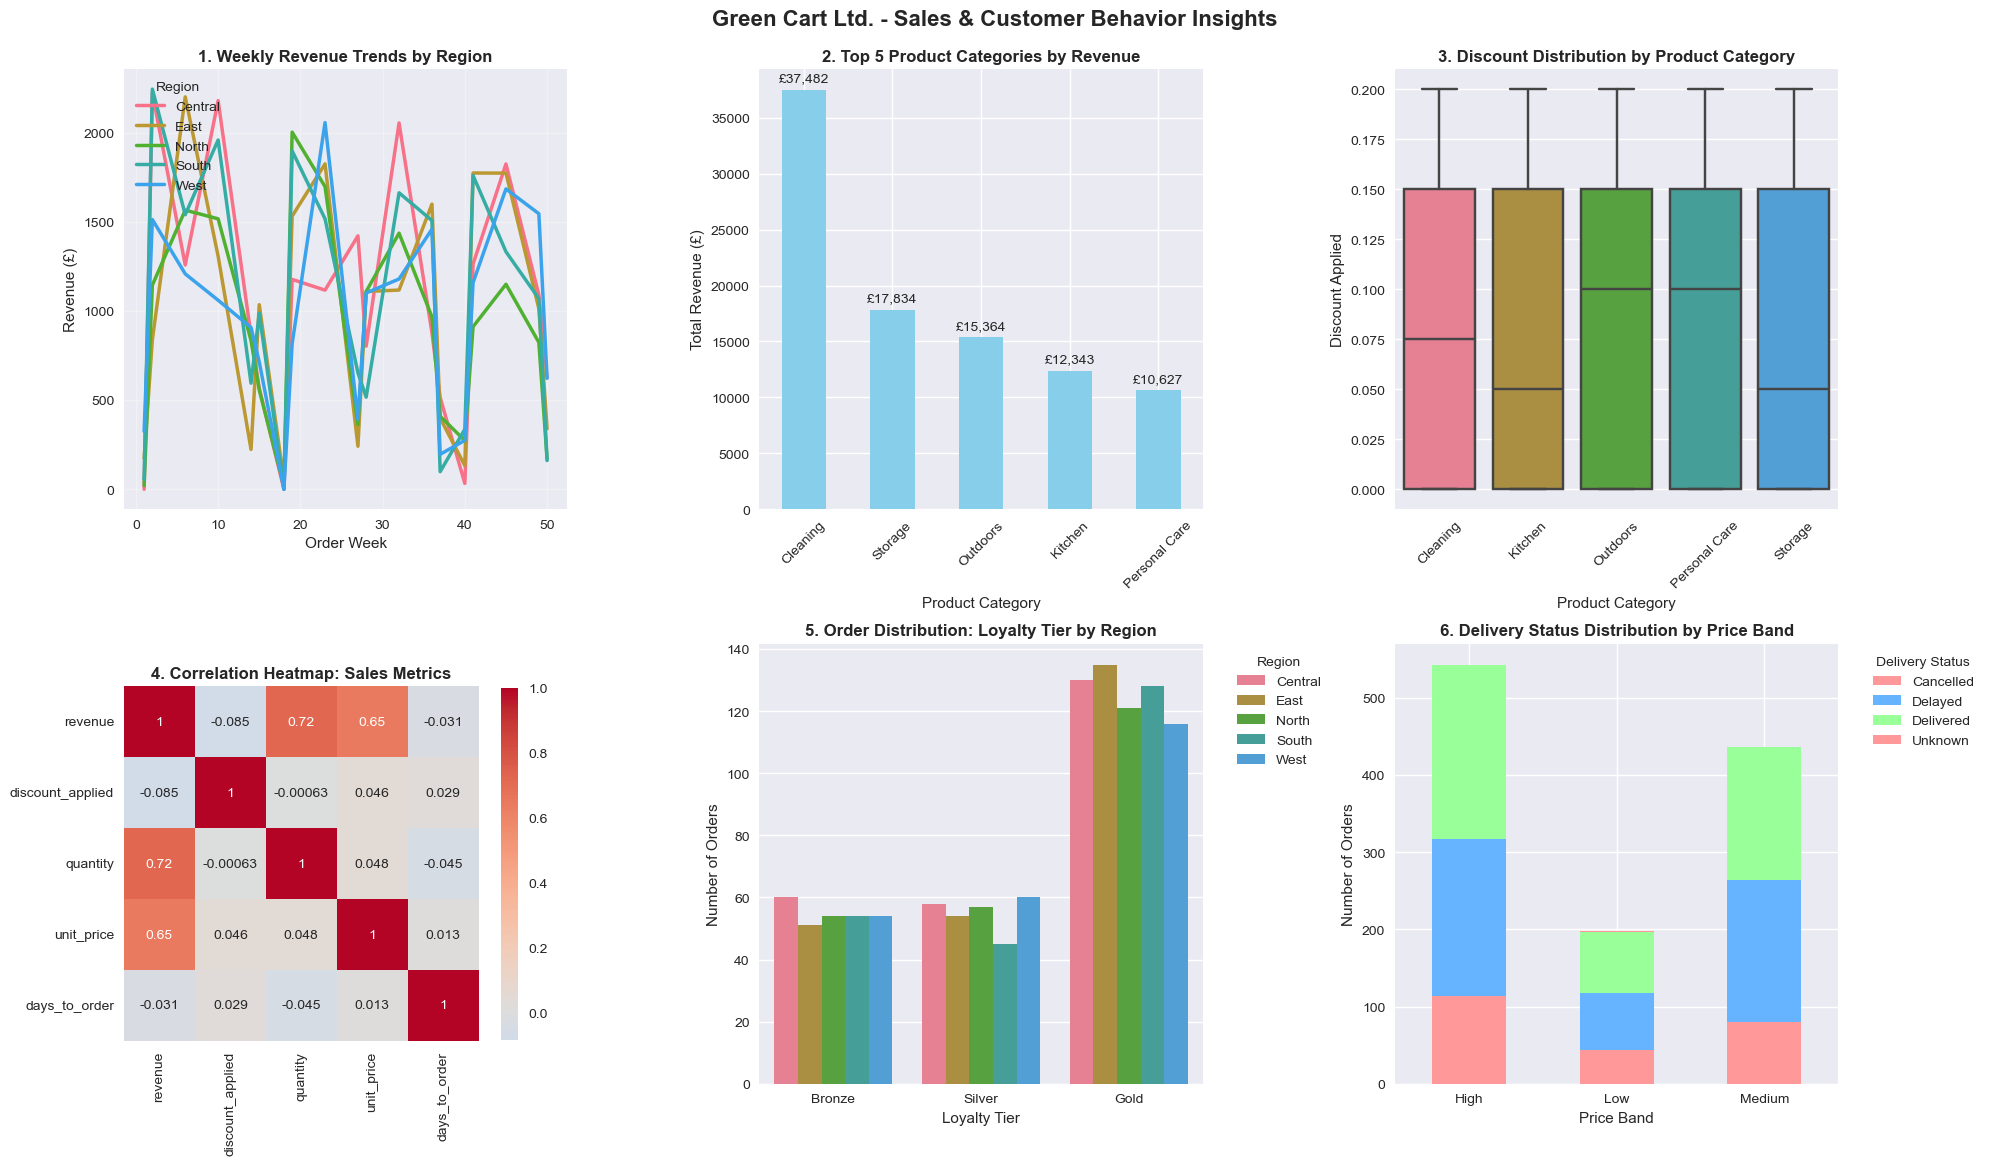


✅ 6 VISUALIZATIONS CREATED SUCCESSFULLY!

ADDITIONAL INSIGHT VISUALIZATIONS
Creating Delivery Performance Heatmap...
Creating Revenue by Loyalty Tier and Region...


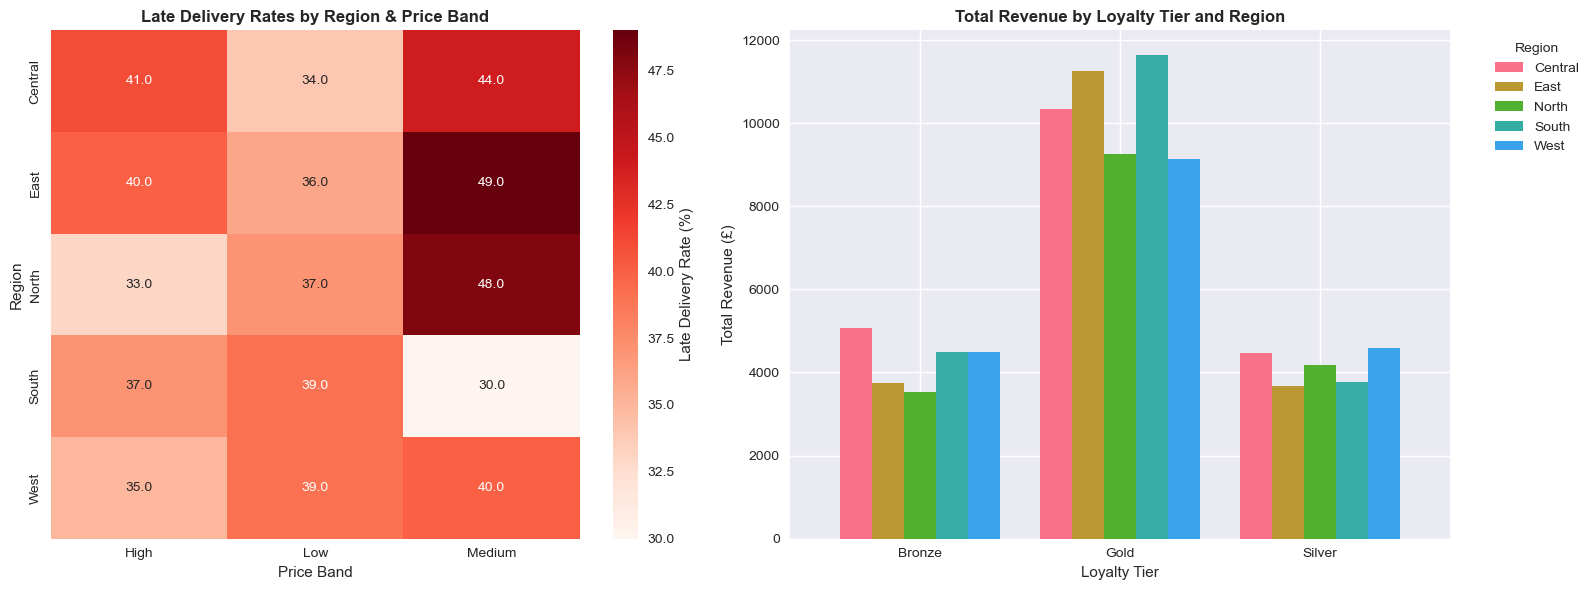


🎯 ALL VISUALIZATIONS COMPLETED!
📊 READY FOR INSIGHTS AND REPORT GENERATION!


In [49]:
# =============================================================================
# VISUAL EXPLORATION
# =============================================================================

print("\n" + "="*60)
print("STEP 6: VISUAL EXPLORATION")
print("="*60)

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Green Cart Ltd. - Sales & Customer Behavior Insights', fontsize=16, fontweight='bold')

# 1. Line plot - weekly revenue trends by region
print("Creating Visualization 1: Weekly Revenue Trends by Region...")
weekly_revenue_trends = merged_df.groupby(['order_week', 'region'])['revenue'].sum().unstack()
weekly_revenue_trends.plot(ax=axes[0,0], linewidth=2.5)
axes[0,0].set_title('1. Weekly Revenue Trends by Region', fontweight='bold')
axes[0,0].set_xlabel('Order Week')
axes[0,0].set_ylabel('Revenue (£)')
axes[0,0].legend(title='Region')
axes[0,0].grid(True, alpha=0.3)

# 2. Bar chart - top 5 categories by revenue
print("Creating Visualization 2: Top 5 Categories by Revenue...")
category_revenue = merged_df.groupby('category')['revenue'].sum().sort_values(ascending=False)
category_revenue.head(5).plot(kind='bar', ax=axes[0,1], color='skyblue')
axes[0,1].set_title('2. Top 5 Product Categories by Revenue', fontweight='bold')
axes[0,1].set_xlabel('Product Category')
axes[0,1].set_ylabel('Total Revenue (£)')
axes[0,1].tick_params(axis='x', rotation=45)
for i, v in enumerate(category_revenue.head(5)):
    axes[0,1].text(i, v + 500, f'£{v:,.0f}', ha='center', va='bottom')

# 3. Boxplot - quantity vs discount across categories
print("Creating Visualization 3: Quantity vs Discount by Category...")
sns.boxplot(data=merged_df, x='category', y='discount_applied', ax=axes[0,2])
axes[0,2].set_title('3. Discount Distribution by Product Category', fontweight='bold')
axes[0,2].set_xlabel('Product Category')
axes[0,2].set_ylabel('Discount Applied')
axes[0,2].tick_params(axis='x', rotation=45)

# 4. Heatmap - correlation between revenue, discount, and quantity
print("Creating Visualization 4: Correlation Heatmap...")
correlation_data = merged_df[['revenue', 'discount_applied', 'quantity', 'unit_price', 'days_to_order']]
correlation_matrix = correlation_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1,0], 
            square=True, cbar_kws={'shrink': 0.8})
axes[1,0].set_title('4. Correlation Heatmap: Sales Metrics', fontweight='bold')

# 5. Countplot - orders by loyalty tier (with hue = region)
print("Creating Visualization 5: Orders by Loyalty Tier and Region...")
sns.countplot(data=merged_df, x='loyalty_tier', hue='region', ax=axes[1,1], 
              order=['Bronze', 'Silver', 'Gold'])
axes[1,1].set_title('5. Order Distribution: Loyalty Tier by Region', fontweight='bold')
axes[1,1].set_xlabel('Loyalty Tier')
axes[1,1].set_ylabel('Number of Orders')
axes[1,1].legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

# 6. Stacked bar - delivery status by price band
print("Creating Visualization 6: Delivery Status by Price Band...")
delivery_price_cross = pd.crosstab(merged_df['price_band'], merged_df['delivery_status'])
delivery_price_cross.plot(kind='bar', stacked=True, ax=axes[1,2], 
                         color=['#ff9999', '#66b3ff', '#99ff99'])
axes[1,2].set_title('6. Delivery Status Distribution by Price Band', fontweight='bold')
axes[1,2].set_xlabel('Price Band')
axes[1,2].set_ylabel('Number of Orders')
axes[1,2].legend(title='Delivery Status', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1,2].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

print("\n✅ 6 VISUALIZATIONS CREATED SUCCESSFULLY!")

# Additional detailed visualizations
print("\n" + "="*40)
print("ADDITIONAL INSIGHT VISUALIZATIONS")
print("="*40)

# Create a separate figure for delivery performance heatmap
fig2, axes2 = plt.subplots(1, 2, figsize=(16, 6))

# Delivery performance heatmap by region and price band
print("Creating Delivery Performance Heatmap...")
delivery_heatmap_data = delivery_performance.reset_index().pivot(
    index='region', columns='price_band', values='late_delivery_rate'
)
sns.heatmap(delivery_heatmap_data, annot=True, cmap='Reds', ax=axes2[0], 
            fmt='.1f', cbar_kws={'label': 'Late Delivery Rate (%)'})
axes2[0].set_title('Late Delivery Rates by Region & Price Band', fontweight='bold')
axes2[0].set_xlabel('Price Band')
axes2[0].set_ylabel('Region')

# Revenue by loyalty tier and region
print("Creating Revenue by Loyalty Tier and Region...")
revenue_loyalty_region = merged_df.groupby(['loyalty_tier', 'region'])['revenue'].sum().unstack()
revenue_loyalty_region.plot(kind='bar', ax=axes2[1], width=0.8)
axes2[1].set_title('Total Revenue by Loyalty Tier and Region', fontweight='bold')
axes2[1].set_xlabel('Loyalty Tier')
axes2[1].set_ylabel('Total Revenue (£)')
axes2[1].legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
axes2[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

print("\n🎯 ALL VISUALIZATIONS COMPLETED!")
print("📊 READY FOR INSIGHTS AND REPORT GENERATION!")

In [53]:
# =============================================================================
# BUSINESS QUESTIONS ANALYSIS
# =============================================================================

print("\n" + "="*60)
print("BUSINESS QUESTIONS ANALYSIS FOR PDF REPORT")
print("="*60)

# 1. Which product categories drive the most revenue, and in which regions?
print("PRODUCT CATEGORY REVENUE DRIVERS BY REGION")
print("-" * 50)
category_region_revenue = merged_df.groupby(['category', 'region'])['revenue'].agg(['sum', 'count']).round(2)
category_region_revenue.columns = ['total_revenue', 'order_count']
category_region_revenue = category_region_revenue.sort_values('total_revenue', ascending=False)

print("Top revenue-generating categories by region:")
print(category_region_revenue.head(10))

# Top category overall
top_category = merged_df.groupby('category')['revenue'].sum().idxmax()
top_category_revenue = merged_df.groupby('category')['revenue'].sum().max()
print(f"\n🏆 Overall top category: {top_category} (£{top_category_revenue:,.2f})")

# 2. Do discounts lead to more items sold?
print("DISCOUNT IMPACT ANALYSIS")
print("-" * 50)
discount_impact = merged_df.groupby(pd.cut(merged_df['discount_applied'], bins=[0, 0.05, 0.1, 0.15, 0.2, 1]))\
    .agg({'quantity': 'mean', 'revenue': 'mean', 'order_id': 'count'})\
    .rename(columns={'order_id': 'order_count'})\
    .round(2)

print("Average quantity and revenue by discount range:")
print(discount_impact)

# Correlation analysis
discount_quantity_corr = merged_df['discount_applied'].corr(merged_df['quantity'])
discount_revenue_corr = merged_df['discount_applied'].corr(merged_df['revenue'])
print(f"\n📊 Correlation between discount and quantity: {discount_quantity_corr:.3f}")
print(f"📊 Correlation between discount and revenue: {discount_revenue_corr:.3f}")

# 3. Which loyalty tier generates the most value?
print("LOYALTY TIER VALUE ANALYSIS")
print("-" * 50)
loyalty_value = merged_df.groupby('loyalty_tier').agg({
    'revenue': ['sum', 'mean', 'count'],
    'quantity': 'mean',
    'unit_price': 'mean',
    'customer_id': 'nunique'
}).round(2)

loyalty_value.columns = ['total_revenue', 'avg_order_value', 'order_count', 'avg_quantity', 'avg_unit_price', 'unique_customers']
loyalty_value = loyalty_value.sort_values('total_revenue', ascending=False)

print("Loyalty tier performance comparison:")
print(loyalty_value)

# Customer Lifetime Value proxy
loyalty_value['revenue_per_customer'] = loyalty_value['total_revenue'] / loyalty_value['unique_customers']
print(f"\n💰 Revenue per customer by tier:")
print(loyalty_value['revenue_per_customer'].sort_values(ascending=False))

# 4. Are certain regions struggling with delivery delays?
print("REGIONAL DELIVERY PERFORMANCE")
print("-" * 50)
regional_delivery = merged_df.groupby('region').agg({
    'is_late': ['sum', 'mean'],
    'order_id': 'count',
    'revenue': 'sum'
}).round(3)

regional_delivery.columns = ['late_deliveries', 'late_delivery_rate', 'total_orders', 'total_revenue']
regional_delivery['late_delivery_rate_pct'] = (regional_delivery['late_delivery_rate'] * 100).round(1)
regional_delivery = regional_delivery.sort_values('late_delivery_rate_pct', ascending=False)

print("Regional delivery performance (sorted by worst performers):")
print(regional_delivery[['late_deliveries', 'late_delivery_rate_pct', 'total_orders', 'total_revenue']])

# 5. Do customer signup patterns influence purchasing activity?
print("SIGNUP PATTERNS & PURCHASING BEHAVIOR")
print("-" * 50)
merged_df['signup_month'] = merged_df['signup_date'].dt.month
signup_analysis = merged_df.groupby('signup_month').agg({
    'revenue': ['sum', 'mean'],
    'order_id': 'count',
    'customer_id': 'nunique',
    'quantity': 'mean'
}).round(2)

signup_analysis.columns = ['total_revenue', 'avg_order_value', 'order_count', 'unique_customers', 'avg_quantity']
signup_analysis['revenue_per_customer'] = signup_analysis['total_revenue'] / signup_analysis['unique_customers']

print("Monthly signup patterns and purchasing behavior:")
print(signup_analysis)

# Time between signup and first purchase
merged_df['days_after_signup'] = (merged_df['order_date'] - merged_df['signup_date']).dt.days
quick_purchases = (merged_df['days_after_signup'] <= 7).sum()
print(f"\n⚡ Customers who purchased within 7 days of signup: {quick_purchases} ({quick_purchases/len(merged_df)*100:.1f}%)")

print("\n✅ BUSINESS QUESTIONS ANALYSIS COMPLETED!")


BUSINESS QUESTIONS ANALYSIS FOR PDF REPORT
PRODUCT CATEGORY REVENUE DRIVERS BY REGION
--------------------------------------------------
Top revenue-generating categories by region:
                  total_revenue  order_count
category region                             
Cleaning Central        7952.47          102
         West           7627.07          105
         East           7609.47           97
         South          7571.75           88
         North          6721.60           88
Storage  South          3909.96           46
         Central        3676.00           41
         East           3519.39           52
Outdoors Central        3424.64           46
Storage  West           3383.54           43

🏆 Overall top category: Cleaning (£37,482.37)
DISCOUNT IMPACT ANALYSIS
--------------------------------------------------
Average quantity and revenue by discount range:
                  quantity  revenue  order_count
discount_applied                                
(0.0, 0.

In [54]:
# =============================================================================
# ADVANCED ANALYTICAL TASKS
# =============================================================================

print("\n" + "="*60)
print("ADVANCED ANALYTICAL TASKS")
print("="*60)

from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 1. Use .query() to extract specific customer segment
print("\n1. HIGH-VALUE Q2 SIGNUPS WITH QUICK PURCHASES")
print("-" * 50)

# Extract Q2 signups (April-June: months 4-6) who ordered within 14 days and got >20% discount
high_value_q2_customers = merged_df.query(
    'signup_month >= 4 and signup_month <= 6 and '
    'days_after_signup <= 14 and '
    'discount_applied > 0.2'
)

print(f"Found {len(high_value_q2_customers)} high-value Q2 customers")
print("\nSample of high-value Q2 customers:")
print(high_value_q2_customers[['customer_id', 'signup_date', 'order_date', 'days_after_signup', 
                              'discount_applied', 'revenue', 'loyalty_tier']].head())

# Analyze this segment
if len(high_value_q2_customers) > 0:
    segment_analysis = high_value_q2_customers.agg({
        'revenue': ['mean', 'sum'],
        'quantity': 'mean',
        'customer_id': 'nunique',
        'discount_applied': 'mean'
    }).round(2)
    print(f"\nHigh-value Q2 segment analysis:")
    print(segment_analysis)

# 2. Use MinMaxScaler to normalize revenue and price
print("\n2. FEATURE NORMALIZATION WITH MINMAXSCALER")
print("-" * 50)

# Initialize scaler
scaler = MinMaxScaler()

# Select numerical features to normalize
numerical_features = ['revenue', 'unit_price', 'base_price', 'quantity']
normalization_data = merged_df[numerical_features].copy()

# Apply MinMax scaling (0 to 1)
normalized_features = scaler.fit_transform(normalization_data)
normalized_df = pd.DataFrame(normalized_features, 
                            columns=[f'{col}_normalized' for col in numerical_features],
                            index=merged_df.index)

# Combine with original data
merged_df_normalized = pd.concat([merged_df, normalized_df], axis=1)

print("Original vs Normalized values (sample):")
sample_comparison = merged_df_normalized[['revenue', 'revenue_normalized', 
                                         'unit_price', 'unit_price_normalized']].head()
print(sample_comparison)

print(f"\nNormalized ranges (0-1 scale):")
for col in numerical_features:
    norm_col = f'{col}_normalized'
    print(f"{col}: {merged_df_normalized[norm_col].min():.3f} to {merged_df_normalized[norm_col].max():.3f}")

# 3. Flag underperforming products
print("\n3. IDENTIFYING UNDERPERFORMING PRODUCTS")
print("-" * 50)

# Define underperformance criteria
product_performance = merged_df.groupby('product_id').agg({
    'quantity': ['sum', 'mean'],           # Low sales volume
    'discount_applied': 'mean',            # High discount
    'is_late': 'mean',                     # Delivery issues
    'revenue': 'sum',                      # Low revenue
    'order_id': 'count'                    # Few orders
}).round(3)

product_performance.columns = ['total_quantity', 'avg_quantity', 'avg_discount', 
                              'late_delivery_rate', 'total_revenue', 'order_count']

# Create underperformance score (higher = worse performance)
product_performance['underperformance_score'] = (
    (1 - product_performance['total_quantity'] / product_performance['total_quantity'].max()) +  # Low quantity
    (product_performance['avg_discount'] / product_performance['avg_discount'].max()) +         # High discount
    (product_performance['late_delivery_rate'])                                                 # Delivery issues
)

# Flag top underperformers
underperformance_threshold = product_performance['underperformance_score'].quantile(0.75)
product_performance['is_underperforming'] = product_performance['underperformance_score'] >= underperformance_threshold

# Get product names for context
product_info_dict = product_info.set_index('product_id')['product_name'].to_dict()
product_performance['product_name'] = product_performance.index.map(product_info_dict)

print(f"Underperforming products (top 10 by score):")
underperformers = product_performance[product_performance['is_underperforming']].sort_values(
    'underperformance_score', ascending=False
).head(10)

print(underperformers[['product_name', 'total_quantity', 'avg_discount', 
                      'late_delivery_rate', 'underperformance_score']])

print(f"\n📊 Underperformance Summary:")
print(f"Total products analyzed: {len(product_performance)}")
print(f"Underperforming products: {product_performance['is_underperforming'].sum()}")
print(f"Underperformance threshold score: {underperformance_threshold:.3f}")

# 4. Additional analysis: Customer segmentation by normalized features
print("\n4. CUSTOMER SEGMENTATION USING NORMALIZED FEATURES")
print("-" * 50)

# Create customer segments based on normalized spending behavior
customer_segments = merged_df_normalized.groupby('customer_id').agg({
    'revenue_normalized': 'mean',
    'quantity_normalized': 'mean',
    'discount_applied': 'mean',
    'order_id': 'count'
}).round(3)

customer_segments.columns = ['avg_revenue_score', 'avg_quantity_score', 'avg_discount', 'total_orders']

# Segment customers based on normalized scores
customer_segments['customer_segment'] = np.where(
    customer_segments['avg_revenue_score'] > 0.7, 'High Value',
    np.where(customer_segments['avg_revenue_score'] > 0.3, 'Medium Value', 'Low Value')
)

print("Customer segmentation by normalized revenue:")
segment_summary = customer_segments.groupby('customer_segment').agg({
    'avg_revenue_score': 'mean',
    'total_orders': 'count'
})
print(segment_summary)

print("\n✅ ADVANCED ANALYTICAL TASKS COMPLETED!")
print("📈 READY FOR COMPREHENSIVE REPORT GENERATION!")


ADVANCED ANALYTICAL TASKS

1. HIGH-VALUE Q2 SIGNUPS WITH QUICK PURCHASES
--------------------------------------------------
Found 0 high-value Q2 customers

Sample of high-value Q2 customers:
Empty DataFrame
Columns: [customer_id, signup_date, order_date, days_after_signup, discount_applied, revenue, loyalty_tier]
Index: []

2. FEATURE NORMALIZATION WITH MINMAXSCALER
--------------------------------------------------
Original vs Normalized values (sample):
   revenue  revenue_normalized  unit_price  unit_price_normalized
0  117.750            0.457271       39.25               0.744990
1   94.600            0.361654       18.92               0.260019
2   25.228            0.075123       29.68               0.516698
3   26.208            0.079171       32.76               0.590172
4   38.096            0.128272       47.62               0.944656

Normalized ranges (0-1 scale):
revenue: 0.000 to 1.000
unit_price: 0.000 to 1.000
base_price: 0.000 to 1.000
quantity: 0.000 to 1.000

3. IDE